In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analisis_por_variable import *
from analisis_descriptivo_multivariado import *
from graficos import *

In [67]:
#Importación de los datos
dataset = pd.read_csv('/home/dalev/Escritorio/Prueba_Comfama/data/resultados_pruebas_saber_3_5_y_9.csv')
dataset.head(15)

año   codigo_dane    establecimiento_educativo sector_educativo  comuna  \
0   2017  105001000001   inst educ jose maria velaz          oficial       2   
1   2017  105001000001   inst educ jose maria velaz          oficial       2   
2   2017  105001000001   inst educ jose maria velaz          oficial       2   
3   2017  105001000001   inst educ jose maria velaz          oficial       2   
4   2017  105001000001   inst educ jose maria velaz          oficial       2   
5   2017  105001000001   inst educ jose maria velaz          oficial       2   
6   2017  105001000043  inst educ barrio santa cruz          oficial       2   
7   2017  105001000043  inst educ barrio santa cruz          oficial       2   
8   2017  105001000043  inst educ barrio santa cruz          oficial       2   
9   2017  105001000043  inst educ barrio santa cruz          oficial       2   
10  2017  105001000043  inst educ barrio santa cruz          oficial       2   
11  2017  105001000043  inst educ barrio santa cruz          oficial       2   
12  2017  105001000132  inst educ jose maria bernal          oficial      16   
13  2017  105001000132  inst educ jose maria bernal          oficial      16   
14  2017  105001000132  inst educ jose maria bernal          oficial      16   

    grado         area  promedio  promedio_establecimiento  desviacion  \
0       5  matemáticas     286.0                       2.4        58.0   
1       5     lenguaje     312.0                       2.4        58.0   
2       3     lenguaje     292.0                       3.0        50.0   
3       9  matemáticas     292.0                       4.9        58.0   
4       3  matemáticas     265.0                       3.1        51.0   
5       9     lenguaje     310.0                       5.0        58.0   
6       3  matemáticas     259.0                       2.8        42.0   
7       3     lenguaje     273.0                       2.7        42.0   
8       9  matemáticas     273.0                       5.6        50.0   
9       5  matemáticas     255.0                       2.6        53.0   
10      9     lenguaje     290.0                       6.9        62.0   
11      5     lenguaje     286.0                       2.4        49.0   
12      5  matemáticas     281.0                       0.0        63.0   
13      3     lenguaje     335.0                       1.3        62.0   
14      9     lenguaje     351.0                       3.5        55.0   

    nivel_superior  nivel_minimo  nivel_satisfactorio  nivel_avanzado  
0               51            28                   15               6  
1               11            46                   33              11  
2               21            48                   23               9  
3               21            63                   14               2  
4               39            44                   12               6  
5                7            51                   39               4  
6               45            39                   16               0  
7               36            44                   19               1  
8               35            61                    2               2  
9               66            27                    3               3  
10              17            52                   26               4  
11              19            54                   25               2  
12              54            23                   16               7  
13               9            30                   32              29  
14               0            26                   61              13

In [68]:
#Se genera una copia del dataset con el fin de realizar las modificaciones necesarias.
dataset_copy = dataset.copy()

In [69]:
#Se eliminan las columnas que no se van a utilizar, en este caso son: "año" y "codigo_dane"
dataset_copy = dataset_copy.drop(['año', 'codigo_dane', 'comuna', 'grado'], axis=1)

#Separación y creación de un dataset que contenga las variables cuantitativas (Tipo float e int)
dataset_numeric = dataset_copy.select_dtypes(include=['float64', 'int64'])
dataset_numeric.head(15)


promedio  promedio_establecimiento  desviacion  nivel_superior  \
0      286.0                       2.4        58.0              51   
1      312.0                       2.4        58.0              11   
2      292.0                       3.0        50.0              21   
3      292.0                       4.9        58.0              21   
4      265.0                       3.1        51.0              39   
5      310.0                       5.0        58.0               7   
6      259.0                       2.8        42.0              45   
7      273.0                       2.7        42.0              36   
8      273.0                       5.6        50.0              35   
9      255.0                       2.6        53.0              66   
10     290.0                       6.9        62.0              17   
11     286.0                       2.4        49.0              19   
12     281.0                       0.0        63.0              54   
13     335.0                       1.3        62.0               9   
14     351.0                       3.5        55.0               0   

    nivel_minimo  nivel_satisfactorio  nivel_avanzado  
0             28                   15               6  
1             46                   33              11  
2             48                   23               9  
3             63                   14               2  
4             44                   12               6  
5             51                   39               4  
6             39                   16               0  
7             44                   19               1  
8             61                    2               2  
9             27                    3               3  
10            52                   26               4  
11            54                   25               2  
12            23                   16               7  
13            30                   32              29  
14            26                   61              13

In [70]:
#Resumen Estadístico de las variables cuantitativas
dataset_numeric.describe()

promedio  promedio_establecimiento   desviacion  nivel_superior  \
count  2096.000000               2096.000000  2096.000000     2150.000000   
mean    313.996183                  3.399189    57.620706       19.293023   
std      37.548899                  3.439604     9.169303       17.790903   
min     227.000000                  0.000000    23.000000        0.000000   
25%     288.000000                  1.500000    52.000000        6.000000   
50%     308.000000                  2.800000    57.000000       15.000000   
75%     335.000000                  4.400000    63.000000       27.000000   
max     496.000000                 36.100000   105.000000       92.000000   

       nivel_minimo  nivel_satisfactorio  nivel_avanzado  
count   2150.000000          2150.000000     2150.000000  
mean      35.505581            27.517674       15.399535  
std       15.990595            15.352578       17.330497  
min        0.000000             0.000000        0.000000  
25%       25.000000            16.000000        4.000000  
50%       37.000000            27.000000        9.000000  
75%       47.000000            36.000000       21.000000  
max       81.000000            89.000000      100.000000

In [71]:
#Revisión superficial de la data
dataset_numeric.info()
dataset_numeric.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   promedio                  2096 non-null   float64
 1   promedio_establecimiento  2096 non-null   float64
 2   desviacion                2096 non-null   float64
 3   nivel_superior            2150 non-null   int64  
 4   nivel_minimo              2150 non-null   int64  
 5   nivel_satisfactorio       2150 non-null   int64  
 6   nivel_avanzado            2150 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 117.7 KB


promedio                    54
promedio_establecimiento    54
desviacion                  54
nivel_superior               0
nivel_minimo                 0
nivel_satisfactorio          0
nivel_avanzado               0
dtype: int64

Dados los valores nulos correspondientes a las variables: "promedio", "promedio_establecimiento" y "desviacion" se procede a realizar un proceso de imputación avanzado.

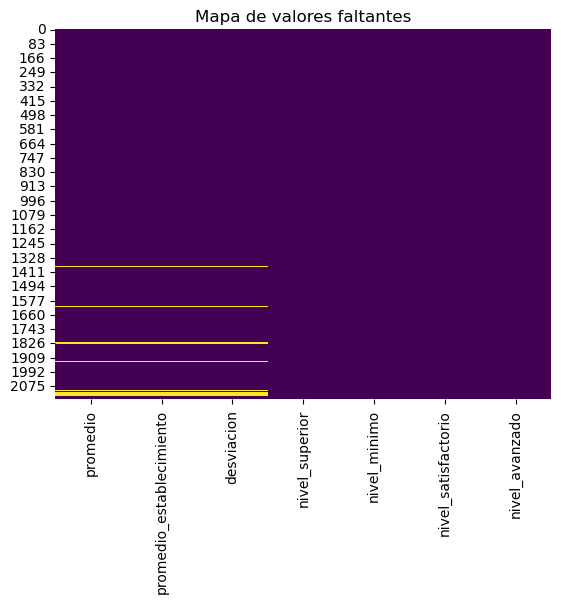

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de valores faltantes
sns.heatmap(dataset_numeric.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes")
plt.show()


Se imputarán los datos utilizando el método KNNImputer, el cual imputa los faltantes utilizando los valores de las observaciones más cercanas en términos de distancia euclidiana. 

In [73]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Transformación de los datos 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset_numeric)

# Configuración del método KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform")  

# Aplicación del imputador
data_imputed = imputer.fit_transform(data_scaled)

# Regreso a la escala original
data_imputed_original_scale = scaler.inverse_transform(data_imputed)

# Conversión a DataFrame
df_imputed = pd.DataFrame(data_imputed_original_scale, columns=dataset_numeric.columns)


In [74]:
df_imputed.head(15)

promedio  promedio_establecimiento  desviacion  nivel_superior  \
0      286.0                       2.4        58.0            51.0   
1      312.0                       2.4        58.0            11.0   
2      292.0                       3.0        50.0            21.0   
3      292.0                       4.9        58.0            21.0   
4      265.0                       3.1        51.0            39.0   
5      310.0                       5.0        58.0             7.0   
6      259.0                       2.8        42.0            45.0   
7      273.0                       2.7        42.0            36.0   
8      273.0                       5.6        50.0            35.0   
9      255.0                       2.6        53.0            66.0   
10     290.0                       6.9        62.0            17.0   
11     286.0                       2.4        49.0            19.0   
12     281.0                       0.0        63.0            54.0   
13     335.0                       1.3        62.0             9.0   
14     351.0                       3.5        55.0             0.0   

    nivel_minimo  nivel_satisfactorio  nivel_avanzado  
0           28.0                 15.0             6.0  
1           46.0                 33.0            11.0  
2           48.0                 23.0             9.0  
3           63.0                 14.0             2.0  
4           44.0                 12.0             6.0  
5           51.0                 39.0             4.0  
6           39.0                 16.0             0.0  
7           44.0                 19.0             1.0  
8           61.0                  2.0             2.0  
9           27.0                  3.0             3.0  
10          52.0                 26.0             4.0  
11          54.0                 25.0             2.0  
12          23.0                 16.0             7.0  
13          30.0                 32.0            29.0  
14          26.0                 61.0            13.0

In [75]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   promedio                  2150 non-null   float64
 1   promedio_establecimiento  2150 non-null   float64
 2   desviacion                2150 non-null   float64
 3   nivel_superior            2150 non-null   float64
 4   nivel_minimo              2150 non-null   float64
 5   nivel_satisfactorio       2150 non-null   float64
 6   nivel_avanzado            2150 non-null   float64
dtypes: float64(7)
memory usage: 117.7 KB


In [76]:
#Resumen estadístico 
df_imputed.describe()

promedio  promedio_establecimiento  desviacion  nivel_superior  \
count  2150.000000               2150.000000  2150.00000     2150.000000   
mean    314.318884                  3.424451    57.97986       19.293023   
std      37.129091                  3.402519     9.32631       17.790903   
min     227.000000                  0.000000    23.00000        0.000000   
25%     288.000000                  1.600000    52.00000        6.000000   
50%     309.000000                  2.900000    57.00000       15.000000   
75%     334.000000                  4.400000    63.00000       27.000000   
max     496.000000                 36.100000   105.00000       92.000000   

       nivel_minimo  nivel_satisfactorio  nivel_avanzado  
count   2150.000000          2150.000000     2150.000000  
mean      35.505581            27.517674       15.399535  
std       15.990595            15.352578       17.330497  
min        0.000000             0.000000        0.000000  
25%       25.000000            16.000000        4.000000  
50%       37.000000            27.000000        9.000000  
75%       47.000000            36.000000       21.000000  
max       81.000000            89.000000      100.000000

In [131]:
#Guardado del dataset imputado
df_imputed.to_csv('/home/dalev/Escritorio/Prueba_Comfama/data/cuantitativasImput.csv', index=False)

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para "promedio"</strong>
</div>

In [77]:
informe(df_imputed, "promedio")

 MEDIDAS DE TENDENCIA CENTRAL 

Media: 314.3188837209302
Mediana: 309.0
Moda: 293.0

   MEDIDAS DE VARIABILIDAD    

Valores Únicos: 207
Máximo: 496.0
Mínimo: 227.0
Varianza: 1378.5694338394271
Desviación Estándar: 37.129091476084184
Rango: 269.0
Coeficiente de Variación: 11.812555146718278

       MEDIDAS DE FORMA       

Coeficiente de Asimetría: 0.8792394356108618
Coeficiente de Curtosis: 1.217024312495858


In [78]:
percentiles(df_imputed, "promedio")

Primer_cuartil  Segundo_cuartil  Tercer_cuartil  Máximo
0           288.0            309.0           334.0   496.0

In [79]:
frecuencias(df_imputed, "promedio")

Intervalo  Frecuencia Absoluta  \
0                (227.0, 247.69230769230768]                   26   
1   (247.69230769230768, 268.38461538461536]                  128   
2    (268.38461538461536, 289.0769230769231]                  413   
3     (289.0769230769231, 309.7692307692308]                  526   
4    (309.7692307692308, 330.46153846153845]                  466   
5    (330.46153846153845, 351.1538461538462]                  271   
6    (351.1538461538462, 371.84615384615387]                  158   
7   (371.84615384615387, 392.53846153846155]                   80   
8    (392.53846153846155, 413.2307692307692]                   43   
9     (413.2307692307692, 433.9230769230769]                   22   
10   (433.9230769230769, 454.61538461538464]                   13   
11   (454.61538461538464, 475.3076923076923]                    2   
12                (475.3076923076923, 496.0]                    2   

    Frecuencia Acumulada  Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                     26             0.012093                       0.012093  
1                    154             0.059535                       0.071628  
2                    567             0.192093                       0.263721  
3                   1093             0.244651                       0.508372  
4                   1559             0.216744                       0.725116  
5                   1830             0.126047                       0.851163  
6                   1988             0.073488                       0.924651  
7                   2068             0.037209                       0.961860  
8                   2111             0.020000                       0.981860  
9                   2133             0.010233                       0.992093  
10                  2146             0.006047                       0.998140  
11                  2148             0.000930                       0.999070  
12                  2150             0.000930                       1.000000

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para "promedio_establecimiento"</strong>
</div>

In [80]:
informe(df_imputed, "promedio_establecimiento")

 MEDIDAS DE TENDENCIA CENTRAL 

Media: 3.4244511627906977
Mediana: 2.9
Moda: 0.0

   MEDIDAS DE VARIABILIDAD    

Valores Únicos: 171
Máximo: 36.1
Mínimo: 0.0
Varianza: 11.577134063458374
Desviación Estándar: 3.4025187822344747
Rango: 36.1
Coeficiente de Variación: 99.35953589309331

       MEDIDAS DE FORMA       

Coeficiente de Asimetría: 3.0535193560790304
Coeficiente de Curtosis: 15.921774263319435


In [81]:
percentiles(df_imputed, "promedio_establecimiento")

Primer_cuartil  Segundo_cuartil  Tercer_cuartil  Máximo
0             1.6              2.9             4.4    36.1

In [82]:
frecuencias(df_imputed, "promedio_establecimiento")

Intervalo  Frecuencia Absoluta  \
0                   (0.0, 2.776923076923077]                 1033   
1     (2.776923076923077, 5.553846153846154]                  810   
2     (5.553846153846154, 8.330769230769231]                  186   
3    (8.330769230769231, 11.107692307692307]                   50   
4   (11.107692307692307, 13.884615384615383]                   31   
5   (13.884615384615383, 16.661538461538463]                   14   
6    (16.661538461538463, 19.43846153846154]                   10   
7    (19.43846153846154, 22.215384615384615]                    5   
8    (22.215384615384615, 24.99230769230769]                    5   
9    (24.99230769230769, 27.769230769230766]                    2   
10  (27.769230769230766, 30.546153846153846]                    2   
11  (30.546153846153846, 33.323076923076925]                    1   
12                (33.323076923076925, 36.1]                    1   

    Frecuencia Acumulada  Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                   1033             0.480465                       0.480465  
1                   1843             0.376744                       0.857209  
2                   2029             0.086512                       0.943721  
3                   2079             0.023256                       0.966977  
4                   2110             0.014419                       0.981395  
5                   2124             0.006512                       0.987907  
6                   2134             0.004651                       0.992558  
7                   2139             0.002326                       0.994884  
8                   2144             0.002326                       0.997209  
9                   2146             0.000930                       0.998140  
10                  2148             0.000930                       0.999070  
11                  2149             0.000465                       0.999535  
12                  2150             0.000465                       1.000000

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para "desviacion"</strong>
</div>

In [83]:
informe(df_imputed, "desviacion")

 MEDIDAS DE TENDENCIA CENTRAL 

Media: 57.979860465116275
Mediana: 57.0
Moda: 57.0

   MEDIDAS DE VARIABILIDAD    

Valores Únicos: 72
Máximo: 105.0
Mínimo: 23.0
Varianza: 86.98006419643544
Desviación Estándar: 9.32631032061637
Rango: 82.0
Coeficiente de Variación: 16.085430778550368

       MEDIDAS DE FORMA       

Coeficiente de Asimetría: 0.4561835351184425
Coeficiente de Curtosis: 1.2842434876267363


In [84]:
percentiles(df_imputed, "desviacion")

Primer_cuartil  Segundo_cuartil  Tercer_cuartil  Máximo
0            52.0             57.0            63.0   105.0

In [85]:
frecuencias(df_imputed, "desviacion")

Intervalo  Frecuencia Absoluta  \
0                (23.0, 29.307692307692307]                    1   
1   (29.307692307692307, 35.61538461538461]                   15   
2    (35.61538461538461, 41.92307692307692]                   46   
3   (41.92307692307692, 48.230769230769226]                  226   
4   (48.230769230769226, 54.53846153846153]                  467   
5    (54.53846153846153, 60.84615384615385]                  640   
6    (60.84615384615385, 67.15384615384616]                  450   
7    (67.15384615384616, 73.46153846153845]                  209   
8    (73.46153846153845, 79.76923076923077]                   55   
9    (79.76923076923077, 86.07692307692307]                   25   
10   (86.07692307692307, 92.38461538461539]                   10   
11    (92.38461538461539, 98.6923076923077]                    4   
12                (98.6923076923077, 105.0]                    2   

    Frecuencia Acumulada  Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                      1             0.000465                       0.000465  
1                     16             0.006977                       0.007442  
2                     62             0.021395                       0.028837  
3                    288             0.105116                       0.133953  
4                    755             0.217209                       0.351163  
5                   1395             0.297674                       0.648837  
6                   1845             0.209302                       0.858140  
7                   2054             0.097209                       0.955349  
8                   2109             0.025581                       0.980930  
9                   2134             0.011628                       0.992558  
10                  2144             0.004651                       0.997209  
11                  2148             0.001860                       0.999070  
12                  2150             0.000930                       1.000000

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para "nivel_superior"</strong>
</div>

In [86]:
informe(df_imputed, "nivel_superior")

 MEDIDAS DE TENDENCIA CENTRAL 

Media: 19.293023255813953
Mediana: 15.0
Moda: 0.0

   MEDIDAS DE VARIABILIDAD    

Valores Únicos: 86
Máximo: 92.0
Mínimo: 0.0
Varianza: 316.5162379473464
Desviación Estándar: 17.79090323584911
Rango: 92.0
Coeficiente de Variación: 92.21418022438667

       MEDIDAS DE FORMA       

Coeficiente de Asimetría: 1.2862527783331756
Coeficiente de Curtosis: 1.4342135239340958


In [87]:
percentiles(df_imputed, "nivel_superior")

Primer_cuartil  Segundo_cuartil  Tercer_cuartil  Máximo
0             6.0             15.0            27.0    92.0

In [88]:
frecuencias(df_imputed, "nivel_superior")

Intervalo  Frecuencia Absoluta  \
0                  (0.0, 7.076923076923077]                  631   
1   (7.076923076923077, 14.153846153846153]                  432   
2   (14.153846153846153, 21.23076923076923]                  350   
3   (21.23076923076923, 28.307692307692307]                  230   
4   (28.307692307692307, 35.38461538461539]                  169   
5    (35.38461538461539, 42.46153846153846]                  102   
6    (42.46153846153846, 49.53846153846153]                   65   
7    (49.53846153846153, 56.61538461538461]                   52   
8    (56.61538461538461, 63.69230769230769]                   48   
9    (63.69230769230769, 70.76923076923077]                   35   
10   (70.76923076923077, 77.84615384615384]                   17   
11   (77.84615384615384, 84.92307692307692]                   13   
12                (84.92307692307692, 92.0]                    6   

    Frecuencia Acumulada  Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                    631             0.293488                       0.293488  
1                   1063             0.200930                       0.494419  
2                   1413             0.162791                       0.657209  
3                   1643             0.106977                       0.764186  
4                   1812             0.078605                       0.842791  
5                   1914             0.047442                       0.890233  
6                   1979             0.030233                       0.920465  
7                   2031             0.024186                       0.944651  
8                   2079             0.022326                       0.966977  
9                   2114             0.016279                       0.983256  
10                  2131             0.007907                       0.991163  
11                  2144             0.006047                       0.997209  
12                  2150             0.002791                       1.000000

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para "nivel_minimo"</strong>
</div>

In [89]:
informe(df_imputed, "nivel_minimo")

 MEDIDAS DE TENDENCIA CENTRAL 

Media: 35.505581395348834
Mediana: 37.0
Moda: 46.0

   MEDIDAS DE VARIABILIDAD    

Valores Únicos: 78
Máximo: 81.0
Mínimo: 0.0
Varianza: 255.69913123464667
Desviación Estándar: 15.990595086945534
Rango: 81.0
Coeficiente de Variación: 45.036849020701496

       MEDIDAS DE FORMA       

Coeficiente de Asimetría: -0.3183335615658569
Coeficiente de Curtosis: -0.3989982905869516


In [90]:
percentiles(df_imputed, "nivel_minimo")

Primer_cuartil  Segundo_cuartil  Tercer_cuartil  Máximo
0            25.0             37.0            47.0    81.0

In [91]:
frecuencias(df_imputed, "nivel_minimo")

Intervalo  Frecuencia Absoluta  \
0                   (0.0, 6.230769230769231]                  120   
1    (6.230769230769231, 12.461538461538462]                   84   
2   (12.461538461538462, 18.692307692307693]                  140   
3   (18.692307692307693, 24.923076923076923]                  153   
4   (24.923076923076923, 31.153846153846153]                  315   
5    (31.153846153846153, 37.38461538461539]                  287   
6     (37.38461538461539, 43.61538461538461]                  322   
7     (43.61538461538461, 49.84615384615385]                  285   
8     (49.84615384615385, 56.07692307692308]                  270   
9     (56.07692307692308, 62.30769230769231]                  116   
10    (62.30769230769231, 68.53846153846153]                   40   
11    (68.53846153846153, 74.76923076923077]                   15   
12                 (74.76923076923077, 81.0]                    3   

    Frecuencia Acumulada  Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                    120             0.055814                       0.055814  
1                    204             0.039070                       0.094884  
2                    344             0.065116                       0.160000  
3                    497             0.071163                       0.231163  
4                    812             0.146512                       0.377674  
5                   1099             0.133488                       0.511163  
6                   1421             0.149767                       0.660930  
7                   1706             0.132558                       0.793488  
8                   1976             0.125581                       0.919070  
9                   2092             0.053953                       0.973023  
10                  2132             0.018605                       0.991628  
11                  2147             0.006977                       0.998605  
12                  2150             0.001395                       1.000000

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para "nivel_satisfactorio"</strong>
</div>

In [92]:
informe(df_imputed, "nivel_satisfactorio")

 MEDIDAS DE TENDENCIA CENTRAL 

Media: 27.517674418604653
Mediana: 27.0
Moda: 27.0

   MEDIDAS DE VARIABILIDAD    

Valores Únicos: 82
Máximo: 89.0
Mínimo: 0.0
Varianza: 235.7016418669582
Desviación Estándar: 15.352577694542314
Rango: 89.0
Coeficiente de Variación: 55.79169758677885

       MEDIDAS DE FORMA       

Coeficiente de Asimetría: 0.5319760612215734
Coeficiente de Curtosis: 0.1793880978906235


In [93]:
percentiles(df_imputed, "nivel_satisfactorio")

Primer_cuartil  Segundo_cuartil  Tercer_cuartil  Máximo
0            16.0             27.0            36.0    89.0

In [94]:
frecuencias(df_imputed, "nivel_satisfactorio")

Intervalo  Frecuencia Absoluta  \
0                   (0.0, 6.846153846153846]                  147   
1    (6.846153846153846, 13.692307692307692]                  254   
2   (13.692307692307692, 20.538461538461537]                  347   
3   (20.538461538461537, 27.384615384615383]                  388   
4   (27.384615384615383, 34.230769230769226]                  382   
5    (34.230769230769226, 41.07692307692307]                  264   
6     (41.07692307692307, 47.92307692307692]                  139   
7     (47.92307692307692, 54.76923076923077]                   97   
8     (54.76923076923077, 61.61538461538461]                   84   
9     (61.61538461538461, 68.46153846153845]                   29   
10     (68.46153846153845, 75.3076923076923]                   11   
11     (75.3076923076923, 82.15384615384615]                    5   
12                 (82.15384615384615, 89.0]                    3   

    Frecuencia Acumulada  Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                    147             0.068372                       0.068372  
1                    401             0.118140                       0.186512  
2                    748             0.161395                       0.347907  
3                   1136             0.180465                       0.528372  
4                   1518             0.177674                       0.706047  
5                   1782             0.122791                       0.828837  
6                   1921             0.064651                       0.893488  
7                   2018             0.045116                       0.938605  
8                   2102             0.039070                       0.977674  
9                   2131             0.013488                       0.991163  
10                  2142             0.005116                       0.996279  
11                  2147             0.002326                       0.998605  
12                  2150             0.001395                       1.000000

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis para "nivel_avanzado"</strong>
</div>

In [95]:
informe(df_imputed, "nivel_avanzado")

 MEDIDAS DE TENDENCIA CENTRAL 

Media: 15.39953488372093
Mediana: 9.0
Moda: 0.0

   MEDIDAS DE VARIABILIDAD    

Valores Únicos: 92
Máximo: 100.0
Mínimo: 0.0
Varianza: 300.34611425541425
Desviación Estándar: 17.33049665345498
Rango: 100.0
Coeficiente de Variación: 112.53909150058354

       MEDIDAS DE FORMA       

Coeficiente de Asimetría: 1.933748482212998
Coeficiente de Curtosis: 3.922850707850886


In [96]:
percentiles(df_imputed, "nivel_avanzado")

Primer_cuartil  Segundo_cuartil  Tercer_cuartil  Máximo
0             4.0              9.0            21.0   100.0

In [97]:
frecuencias(df_imputed, "nivel_avanzado")

Intervalo  Frecuencia Absoluta  \
0                  (0.0, 7.6923076923076925]                  935   
1   (7.6923076923076925, 15.384615384615385]                  512   
2   (15.384615384615385, 23.076923076923077]                  243   
3    (23.076923076923077, 30.76923076923077]                  148   
4     (30.76923076923077, 38.46153846153846]                   95   
5     (38.46153846153846, 46.15384615384615]                   75   
6     (46.15384615384615, 53.84615384615385]                   30   
7     (53.84615384615385, 61.53846153846154]                   32   
8     (61.53846153846154, 69.23076923076923]                   30   
9     (69.23076923076923, 76.92307692307692]                   24   
10    (76.92307692307692, 84.61538461538461]                   14   
11     (84.61538461538461, 92.3076923076923]                    8   
12                 (92.3076923076923, 100.0]                    4   

    Frecuencia Acumulada  Frecuencia Relativa  Frecuencia Relativa Acumulada  
0                    935             0.434884                       0.434884  
1                   1447             0.238140                       0.673023  
2                   1690             0.113023                       0.786047  
3                   1838             0.068837                       0.854884  
4                   1933             0.044186                       0.899070  
5                   2008             0.034884                       0.933953  
6                   2038             0.013953                       0.947907  
7                   2070             0.014884                       0.962791  
8                   2100             0.013953                       0.976744  
9                   2124             0.011163                       0.987907  
10                  2138             0.006512                       0.994419  
11                  2146             0.003721                       0.998140  
12                  2150             0.001860                       1.000000

<div style="text-align: center; font-size: 24px;">
    <strong>Análisis de Correlaciones lineales</strong>
</div>

<div style="text-align: center; font-size: 20px;">
    <strong>Matriz de Varianza y Covarianza</strong>
</div>

In [98]:
matriz_de_var_and_cov(df_imputed)

promedio  promedio_establecimiento  desviacion  \
promedio                  1378.569434                 -5.795533  106.645662   
promedio_establecimiento    -5.795533                 11.577134    5.476558   
desviacion                 106.645662                  5.476558   86.980064   
nivel_superior            -498.126895                  1.020631  -26.513361   
nivel_minimo              -337.125187                  1.344756  -37.944769   
nivel_satisfactorio        280.103389                 -2.828666   -9.480775   
nivel_avanzado             523.959227                 -2.045004   39.666775   

                          nivel_superior  nivel_minimo  nivel_satisfactorio  \
promedio                     -498.126895   -337.125187           280.103389   
promedio_establecimiento        1.020631      1.344756            -2.828666   
desviacion                    -26.513361    -37.944769            -9.480775   
nivel_superior                316.516238     40.152389          -169.734823   
nivel_minimo                   40.152389    255.699131           -42.832346   
nivel_satisfactorio          -169.734823    -42.832346           235.701642   
nivel_avanzado               -140.569431   -167.492924            41.969901   

                          nivel_avanzado  
promedio                      523.959227  
promedio_establecimiento       -2.045004  
desviacion                     39.666775  
nivel_superior               -140.569431  
nivel_minimo                 -167.492924  
nivel_satisfactorio            41.969901  
nivel_avanzado                300.346114

<div style="text-align: center; font-size: 20px;">
    <strong>Matriz de Correlación</strong>
</div>

In [99]:
matriz_de_corr(df_imputed)

promedio  promedio_establecimiento  desviacion  \
promedio                  1.000000                 -0.045875    0.307978   
promedio_establecimiento -0.045875                  1.000000    0.172583   
desviacion                0.307978                  0.172583    1.000000   
nivel_superior           -0.754098                  0.016860   -0.159793   
nivel_minimo             -0.567822                  0.024716   -0.254435   
nivel_satisfactorio       0.491386                 -0.054150   -0.066214   
nivel_avanzado            0.814277                 -0.034680    0.245418   

                          nivel_superior  nivel_minimo  nivel_satisfactorio  \
promedio                       -0.754098     -0.567822             0.491386   
promedio_establecimiento        0.016860      0.024716            -0.054150   
desviacion                     -0.159793     -0.254435            -0.066214   
nivel_superior                  1.000000      0.141140            -0.621429   
nivel_minimo                    0.141140      1.000000            -0.174472   
nivel_satisfactorio            -0.621429     -0.174472             1.000000   
nivel_avanzado                 -0.455913     -0.604395             0.157741   

                          nivel_avanzado  
promedio                        0.814277  
promedio_establecimiento       -0.034680  
desviacion                      0.245418  
nivel_superior                 -0.455913  
nivel_minimo                   -0.604395  
nivel_satisfactorio             0.157741  
nivel_avanzado                  1.000000

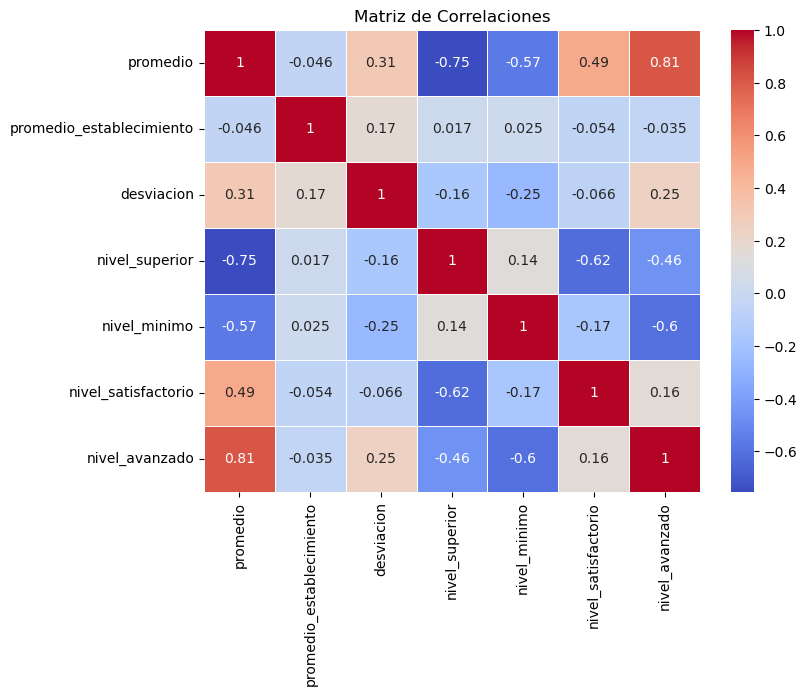

In [100]:
#Gráfico de la matriz de correlación
grafico_corr(df_imputed)

<div style="text-align: center; font-size: 20px;">
    <strong>Normalización de los Datos</strong>
</div>

In [102]:
#Dado que los datos poseen valores en 0, antes de ejecutar una transformación de potencia se procesaran  con el fin de evitar inconvenientes.

data_procesada = df_imputed.copy()
variables_a_procesar = ['promedio_establecimiento', 'nivel_superior', 'nivel_minimo', 'nivel_satisfactorio', 'nivel_avanzado']
data_procesada[variables_a_procesar] = data_procesada[variables_a_procesar] - data_procesada[variables_a_procesar].min() + 1

In [103]:
#Tranformación logarítmica
data_log_transformed = data_procesada.apply(np.log)
data_log_transformed.describe()

promedio  promedio_establecimiento   desviacion  nivel_superior  \
count  2150.000000               2150.000000  2150.000000     2150.000000   
mean      5.743745                  1.247947     4.047131        2.493055   
std       0.114372                  0.712987     0.162063        1.199949   
min       5.424950                  0.000000     3.135494        0.000000   
25%       5.662960                  0.955511     3.951244        1.945910   
50%       5.733341                  1.360977     4.043051        2.772589   
75%       5.811141                  1.686399     4.143135        3.332205   
max       6.206576                  3.613617     4.653960        4.532599   

       nivel_minimo  nivel_satisfactorio  nivel_avanzado  
count   2150.000000          2150.000000     2150.000000  
mean       3.403245             3.138020        2.256118  
std        0.815962             0.781806        1.121200  
min        0.000000             0.000000        0.000000  
25%        3.258097             2.833213        1.609438  
50%        3.637586             3.332205        2.302585  
75%        3.871201             3.610918        3.091042  
max        4.406719             4.499810        4.615121

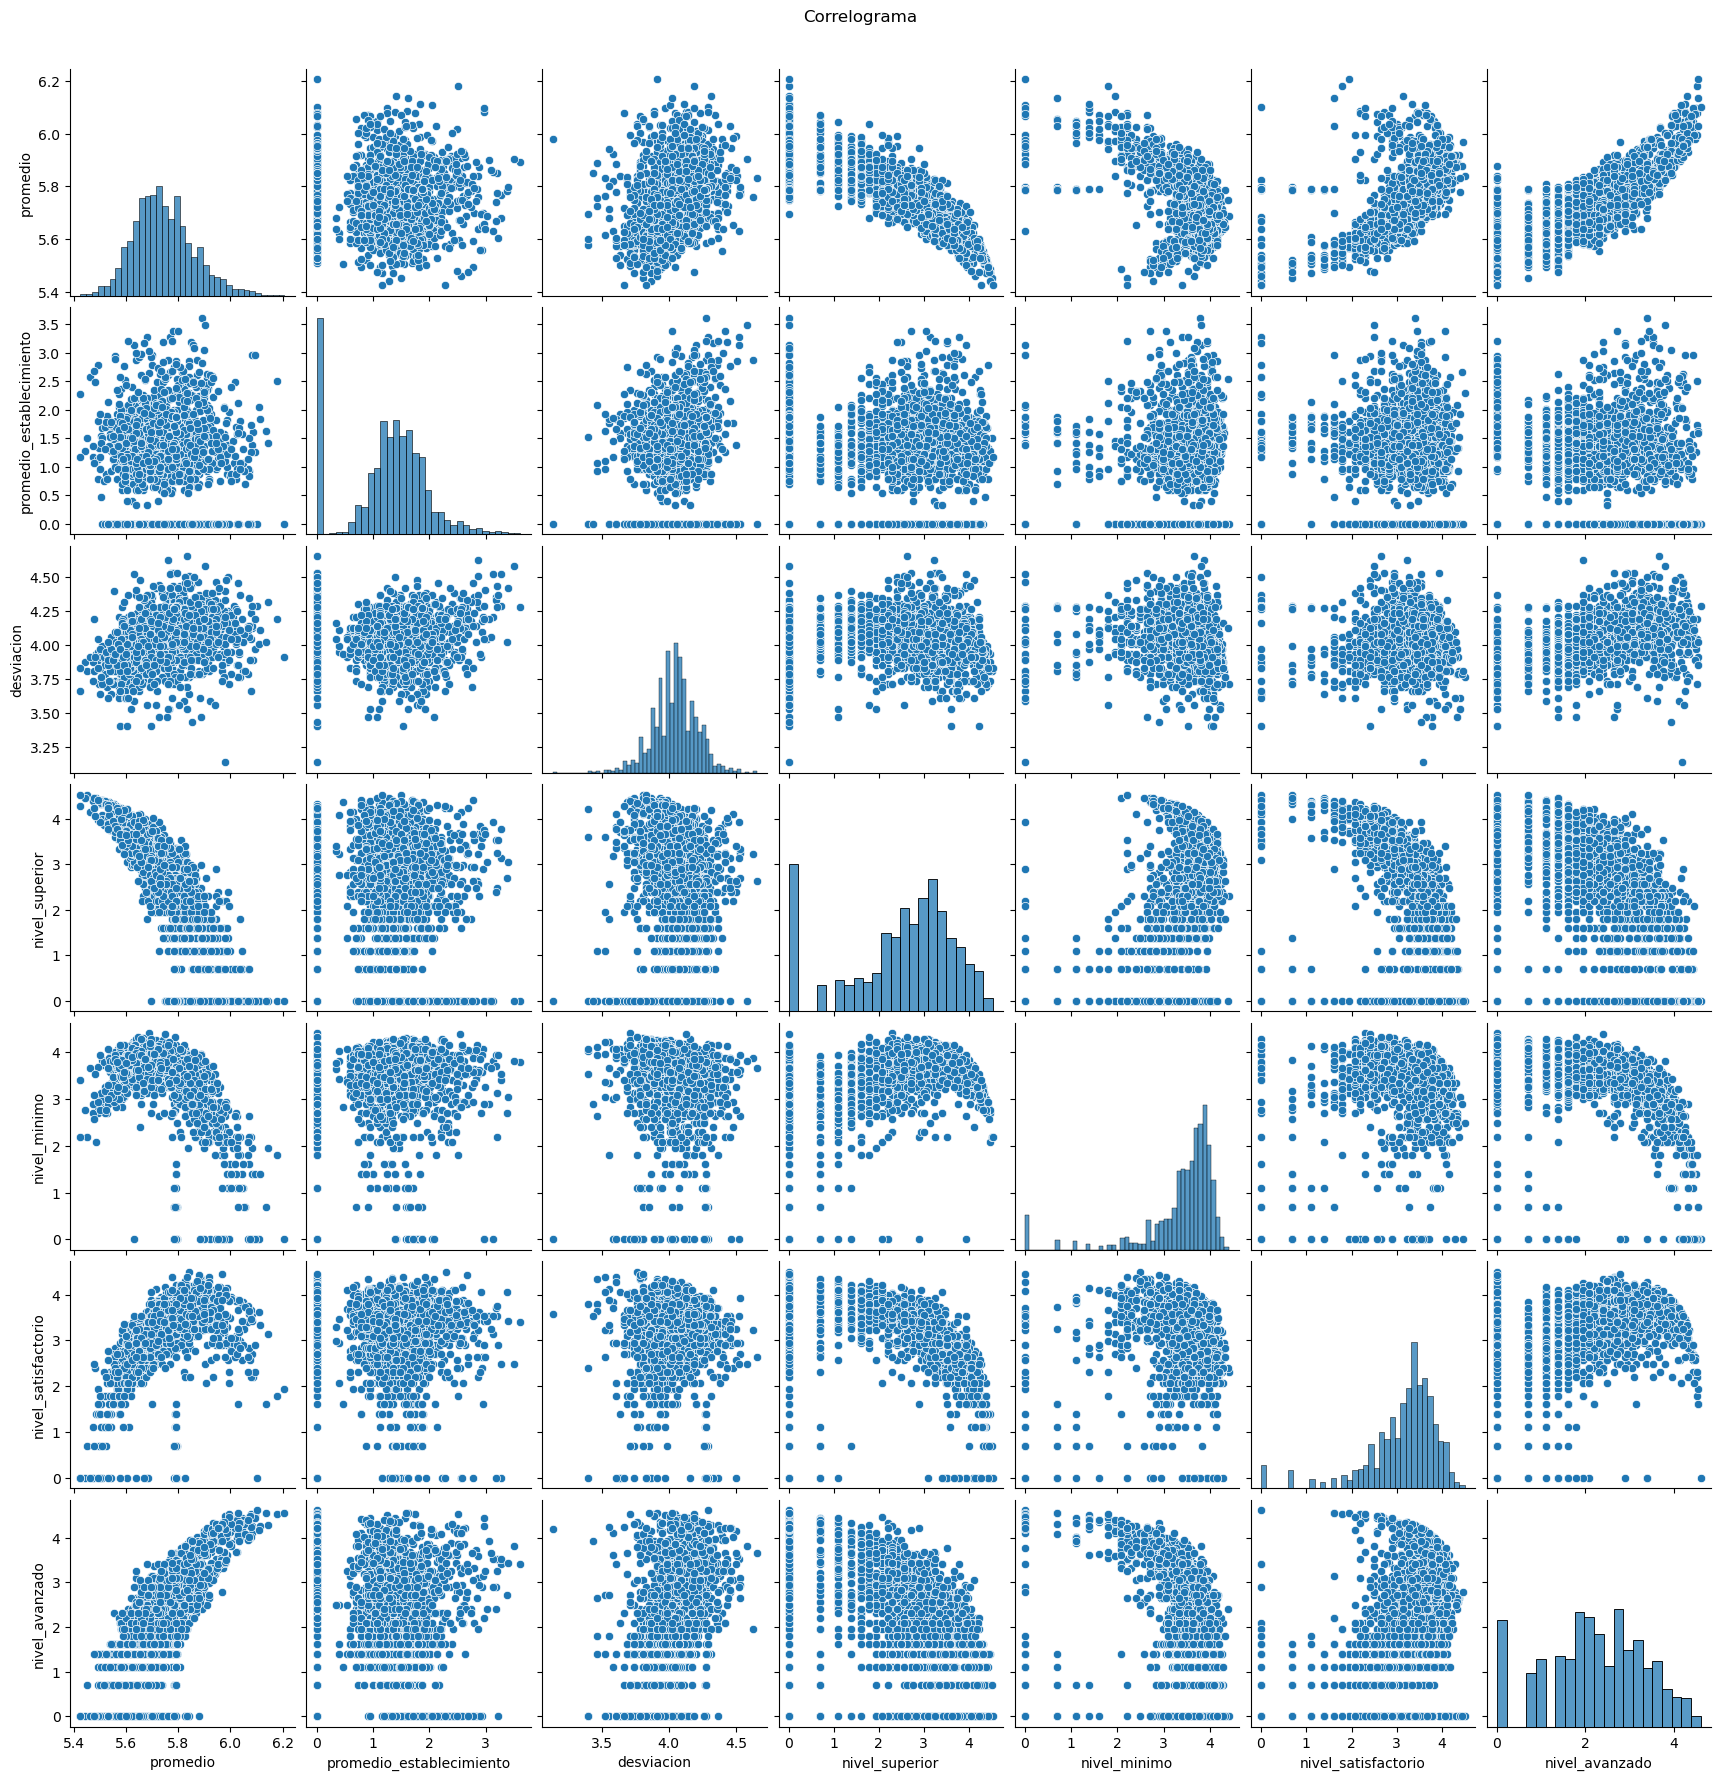

In [104]:
#Revisión gráfica superficial 
correlograma(data_log_transformed)

<div style="text-align: center; font-size: 24px;">
    <strong>Pruebas de Hipótesis para comprobar Normalidad</strong>
</div>

* **H0: Los datos siguen una distribución normal**
* **Ha: Los datos no siguen una distribución normal**

In [105]:
# Test de Kolmogorov-Smirnov para la normalidad
def test_normalidad(data):
    ks_statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f"KS Statistic: {ks_statistic}")
    print(f"P-Value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
    else:
        print("No podemos rechazar la hipótesis nula: los datos siguen una distribución normal.")


for column in data_log_transformed.columns:
    print(f"Columna: {column}")
    test_normalidad(data_log_transformed[column])
    print("\n")


Columna: promedio
KS Statistic: 0.04770334543071675
P-Value: 0.00010861104623534333
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: promedio_establecimiento
KS Statistic: 0.1320955854846919
P-Value: 3.569085738072602e-33
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: desviacion
KS Statistic: 0.058449555685435195
P-Value: 7.94288720121644e-07
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: nivel_superior
KS Statistic: 0.11217402669409526
P-Value: 5.085901365768214e-24
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: nivel_minimo
KS Statistic: 0.19822711691009526
P-Value: 1.6440765827151817e-74
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: nivel_satisfactorio
KS Statistic: 0.13033853052975725
P-Value: 2.6349649827146007e-32
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.



In [106]:
#Transformación de Box-Cox (Conciendo en lambda al que se elevarán los datos)
from scipy.stats import boxcox

data_boxcox_transformed = data_procesada.copy()
lambdas = {}  # Diccionario para almacenar el lambda de cada columna

for column in data_boxcox_transformed.columns:
    # Verifica que no haya valores negativos ni ceros
    if (data_boxcox_transformed[column] > 0).all():
        data_boxcox_transformed[column], lambda_value = boxcox(data_boxcox_transformed[column])
        lambdas[column] = lambda_value  # Guarda el lambda para la columna
    else:
        print(f"La columna '{column}' contiene valores <= 0 y no puede transformarse con Box-Cox.")

# Mostrar los valores de lambda
print("Valores de lambda utilizados:")
for column, lambda_value in lambdas.items():
    print(f"Columna '{column}': lambda = {lambda_value:.4f}")


Valores de lambda utilizados:
Columna 'promedio': lambda = -1.3962
Columna 'promedio_establecimiento': lambda = 0.1377
Columna 'desviacion': lambda = 0.3959
Columna 'nivel_superior': lambda = 0.3205
Columna 'nivel_minimo': lambda = 1.0294
Columna 'nivel_satisfactorio': lambda = 0.6498
Columna 'nivel_avanzado': lambda = 0.1179


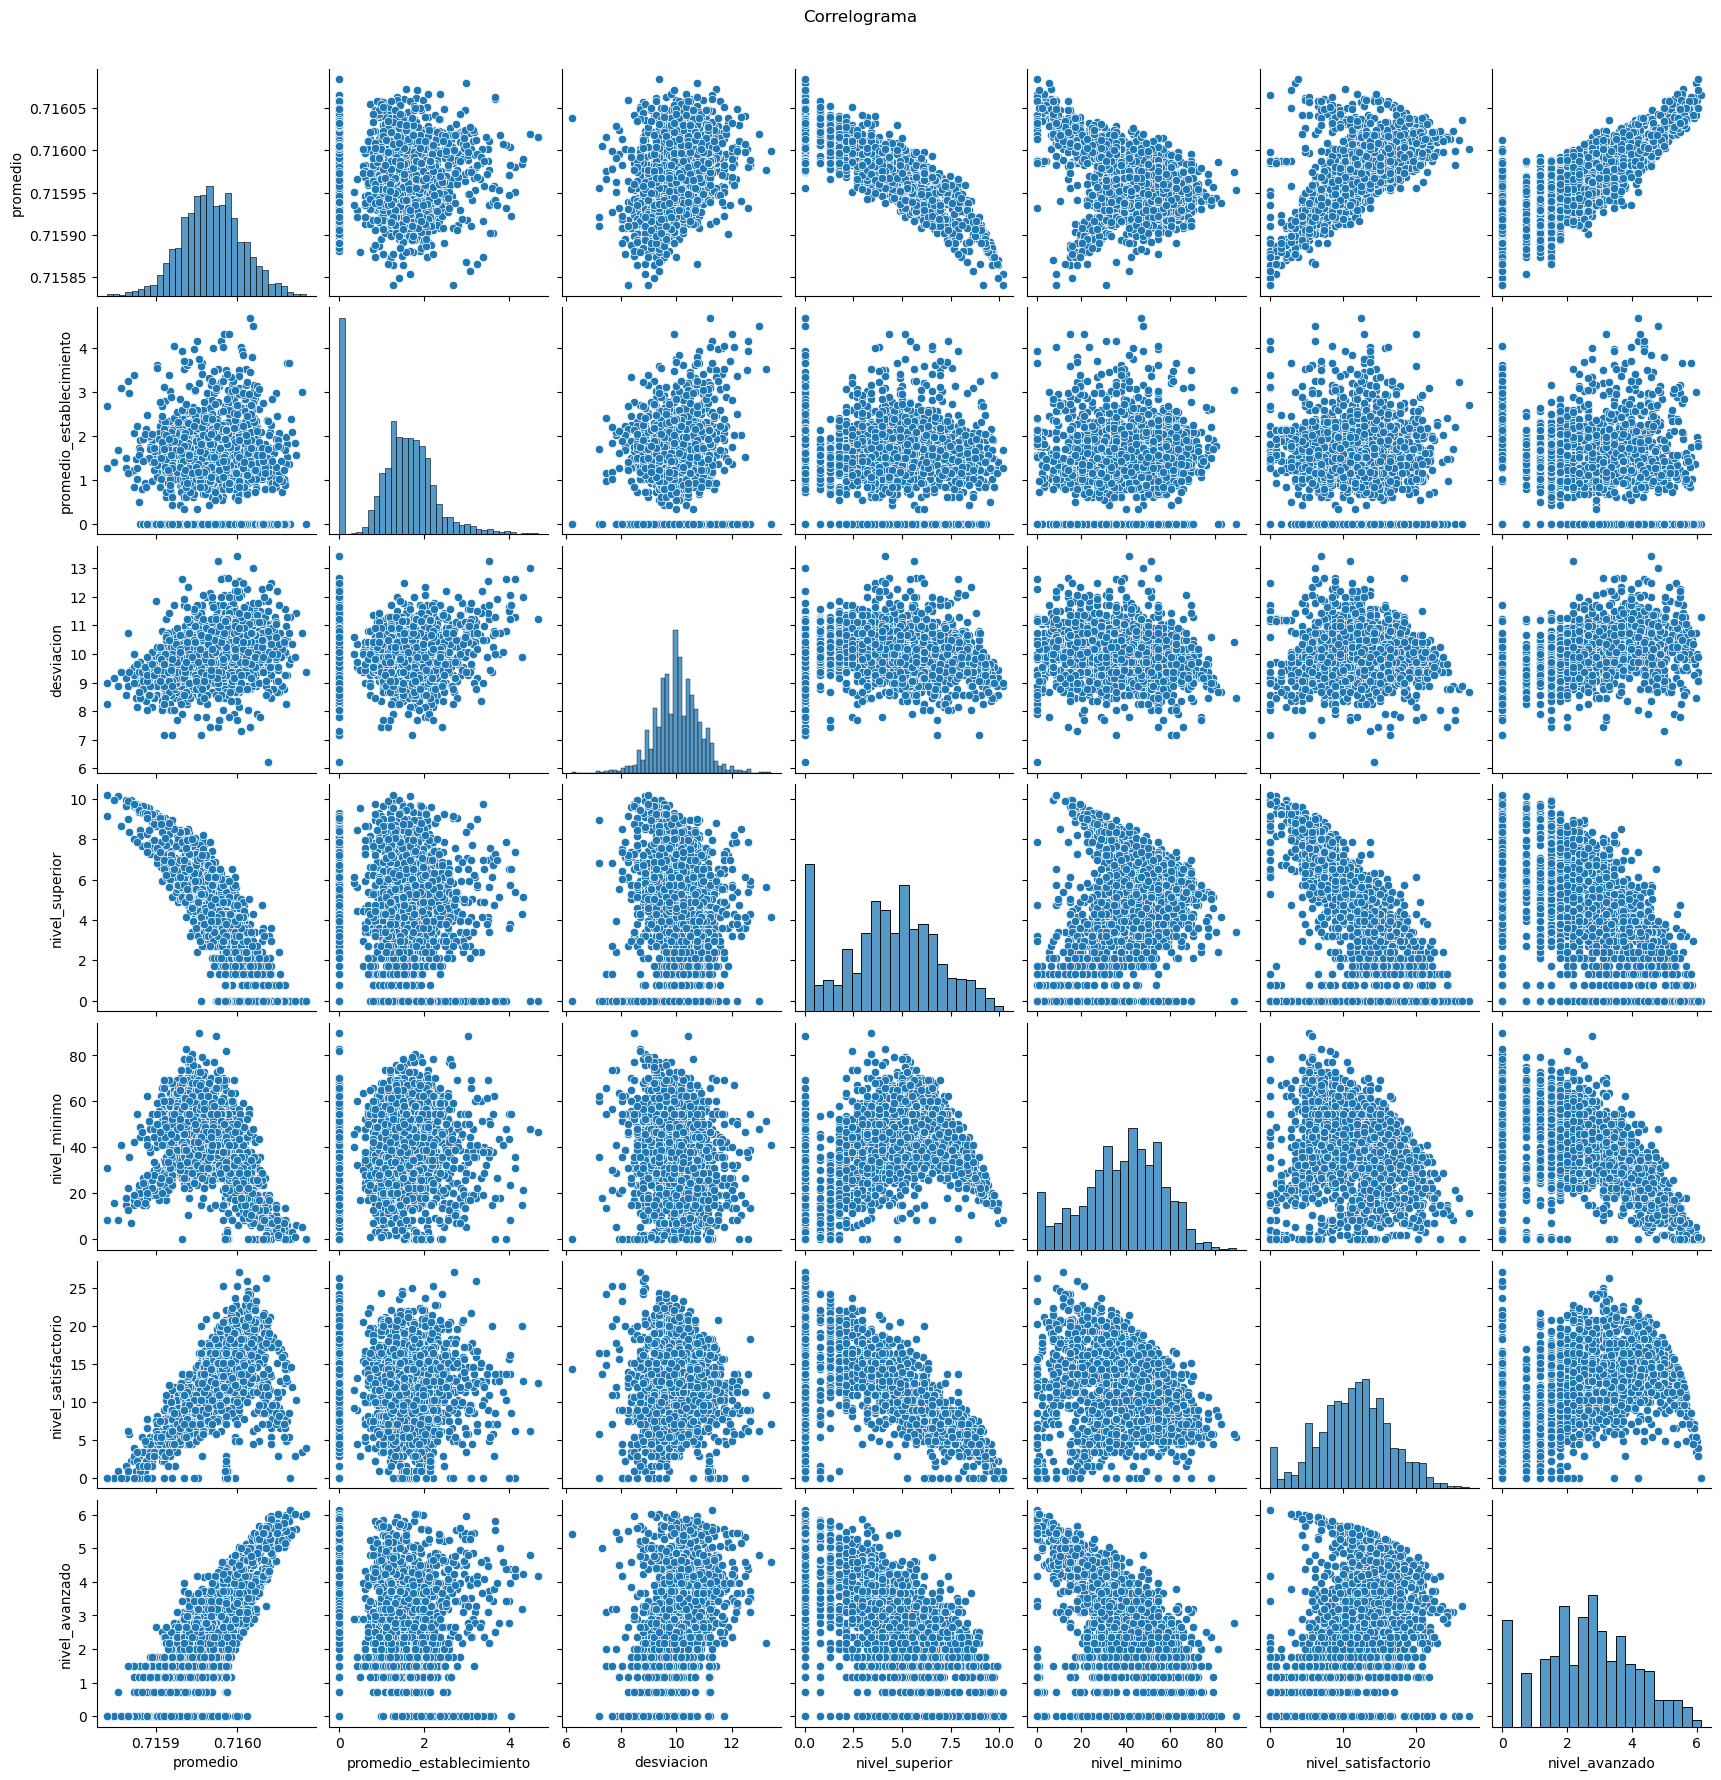

In [107]:
#Revisión gráfica superficial 
correlograma(data_boxcox_transformed)

In [108]:
data_boxcox_transformed.describe()

promedio  promedio_establecimiento   desviacion  nivel_superior  \
count  2150.000000               2150.000000  2150.000000     2150.000000   
mean      0.715969                  1.402849    10.039276        4.292475   
std       0.000037                  0.840620     0.801041        2.470523   
min       0.715840                  0.000000     6.214504        0.000000   
25%       0.715944                  1.021227     9.546481        2.701131   
50%       0.715969                  1.496871     9.993356        4.466964   
75%       0.715993                  1.898302    10.499380        5.957296   
max       0.716084                  4.682465    13.418919       10.216050   

       nivel_minimo  nivel_satisfactorio  nivel_avanzado  
count   2150.000000          2150.000000     2150.000000  
mean      38.581152            11.525282        2.680336  
std       17.667497             4.920742        1.447998  
min        0.000000             0.000000        0.000000  
25%       26.822761             8.160385        1.772275  
50%       40.106085            11.874868        2.645454  
75%       51.273146            14.537958        3.729441  
max       89.694367            27.105362        6.133180

<div style="text-align: center; font-size: 24px;">
    <strong>Pruebas de Hipótesis para comprobar Normalidad</strong>
</div>

* **H0: Los datos siguen una distribución normal**
* **Ha: Los datos no siguen una distribución normal**

In [109]:
# Test de Kolmogorov-Smirnov para la normalidad
for column in data_boxcox_transformed.columns:
    print(f"Columna: {column}")
    test_normalidad(data_boxcox_transformed[column])
    print("\n")

Columna: promedio
KS Statistic: 0.01769903787506477
P-Value: 0.5052568693887378
No podemos rechazar la hipótesis nula: los datos siguen una distribución normal.


Columna: promedio_establecimiento
KS Statistic: 0.12455573108630551
P-Value: 1.5666752013700037e-29
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: desviacion
KS Statistic: 0.047461842016826905
P-Value: 0.00011992295949181255
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: nivel_superior
KS Statistic: 0.07609335321456494
P-Value: 2.838728894964043e-11
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: nivel_minimo
KS Statistic: 0.05201795716406232
P-Value: 1.699496587901045e-05
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


Columna: nivel_satisfactorio
KS Statistic: 0.035900441323600485
P-Value: 0.007644037358775162
Rechazamos la hipótesis nula: los datos no siguen una distribución norma

**Dado que los datos no se ajustan a una distribución normal, se realizará un análisis gráfico del por qué, para ello se hará uso de los gráficos Q-Q Plot o gráficos de normalidad.**

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

def grafico_normalidad(data, titulo="Gráfico de Normalidad (Q-Q Plot)"):
    plt.figure(figsize=(8, 6))
    probplot(data, dist="norm", plot=plt)
    plt.title(titulo, fontsize=14)
    plt.grid(True, alpha=0.6)
    plt.show()

def graficos_normalidad_todas_las_columnas(dataframe):
    for column in dataframe.columns:
        print(f"Gráfico de normalidad para la columna: {column}")
        grafico_normalidad(dataframe[column], titulo=f"Normalidad: {column}")


Gráfico de normalidad para la columna: promedio


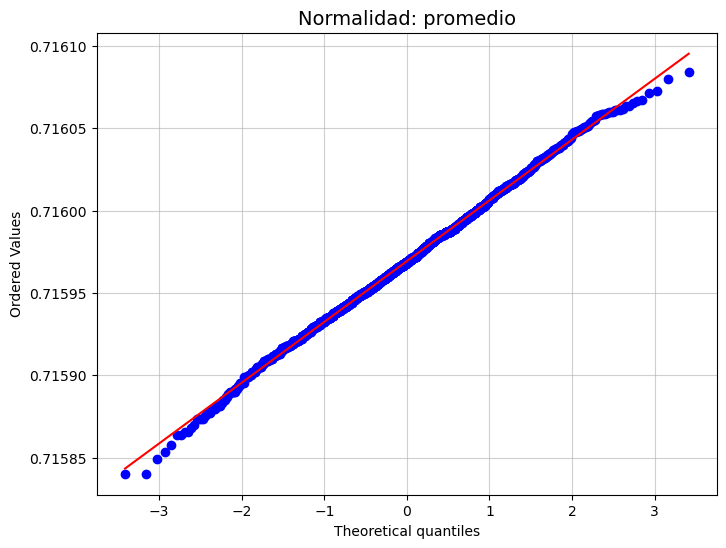

Gráfico de normalidad para la columna: promedio_establecimiento


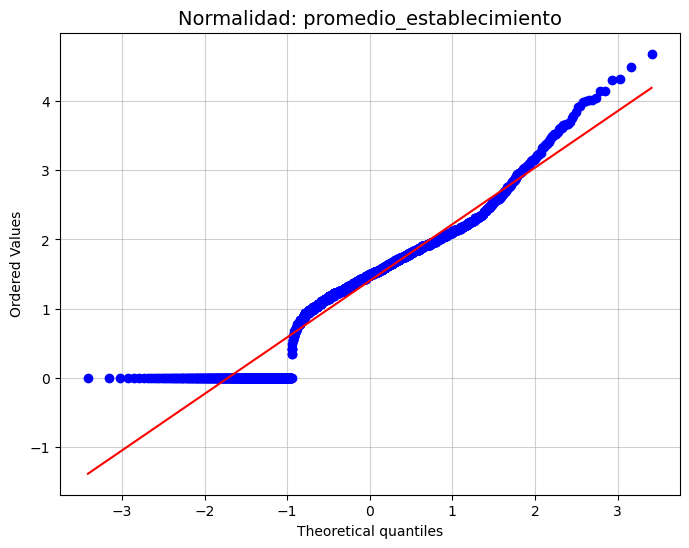

Gráfico de normalidad para la columna: desviacion


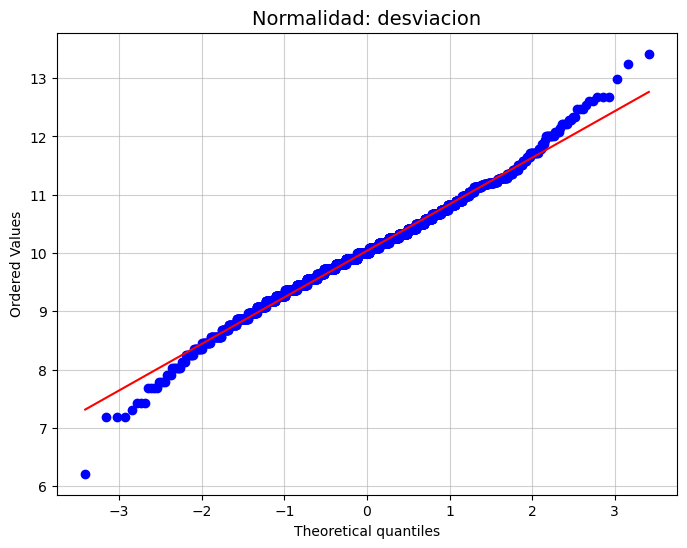

Gráfico de normalidad para la columna: nivel_superior


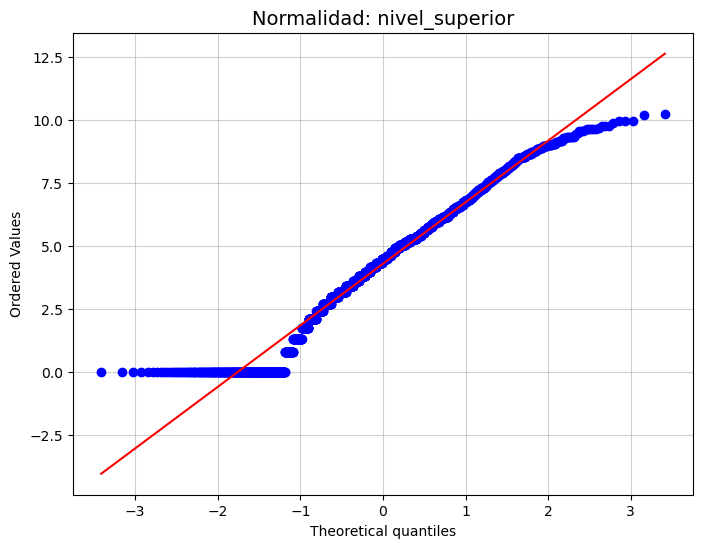

Gráfico de normalidad para la columna: nivel_minimo


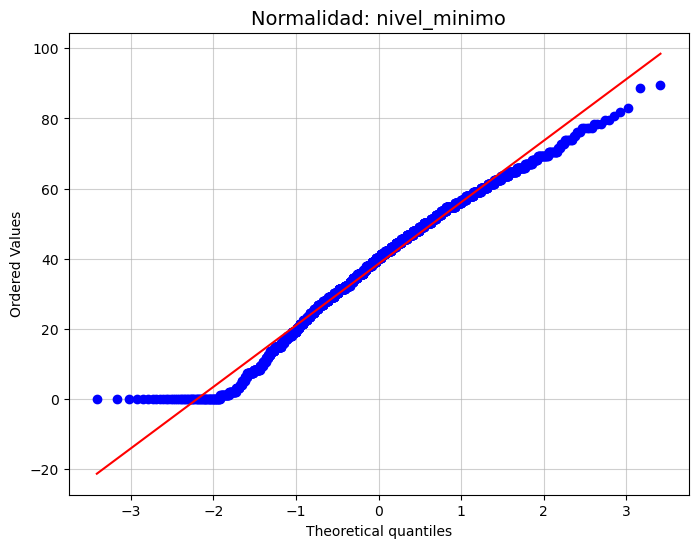

Gráfico de normalidad para la columna: nivel_satisfactorio


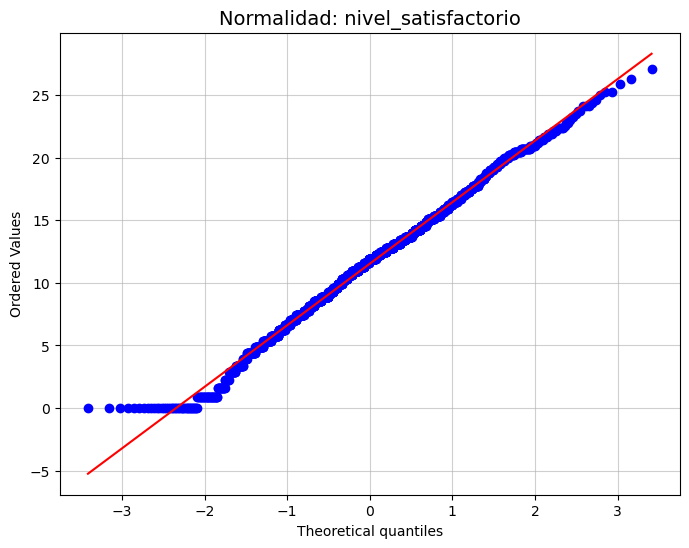

Gráfico de normalidad para la columna: nivel_avanzado


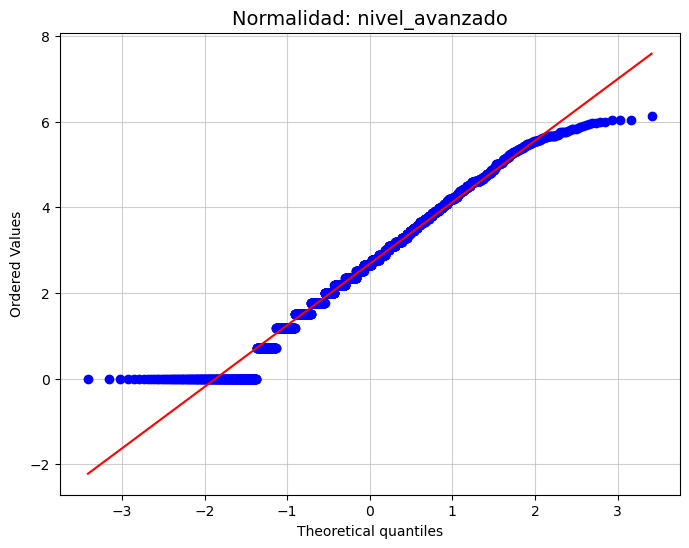

In [111]:
graficos_normalidad_todas_las_columnas(data_boxcox_transformed)

In [112]:
#Revisión de los valores con mayor frecuencia en cada variable
for column in data_boxcox_transformed.columns:
    print(f"Columna: {column}")
    print(data_boxcox_transformed[column].value_counts().nlargest(5))
    print("\n")


Columna: promedio
0.715950    35
0.715949    31
0.715972    31
0.715962    29
0.715954    29
Name: promedio, dtype: int64


Columna: promedio_establecimiento
0.000000    370
1.433605     57
1.261487     54
1.332941     52
1.224304     50
Name: promedio_establecimiento, dtype: int64


Columna: desviacion
9.993356     125
9.905934     119
9.728218     107
10.165459    101
9.817564     101
Name: desviacion, dtype: int64


Columna: nivel_superior
0.000000    252
3.406063     72
3.189380     70
2.701131     66
5.282164     65
Name: nivel_superior, dtype: int64


Columna: nivel_minimo
50.153100    63
54.637344    63
35.662285    60
47.915121    59
42.333240    59
Name: nivel_minimo, dtype: int64


Columna: nivel_satisfactorio
11.874868    71
12.791983    70
13.090690    67
8.887315     63
10.922603    63
Name: nivel_satisfactorio, dtype: int64


Columna: nivel_avanzado
0.000000    183
1.506022    121
1.172938    116
1.772275    116
2.356527    111
Name: nivel_avanzado, dtype: int64




In [113]:
#Revisión de datos atípicos a través de los residuales estandarizados en cada variable

from scipy.stats import zscore

def detectar_atipicos_zscore(dataframe, threshold=3):
    outliers = {}
    for column in dataframe.columns:
        z_scores = zscore(dataframe[column].dropna())  # Calcula los Z-scores
        outliers[column] = dataframe[abs(z_scores) > threshold]  # Filtra valores atípicos
    return outliers

outliers_zscore = detectar_atipicos_zscore(data_boxcox_transformed, threshold=3)

for column, df_outliers in outliers_zscore.items():
    print(f"Columna: {column}")
    print(df_outliers if not df_outliers.empty else "Sin outliers detectados.")
    print("\n")

Columna: promedio
      promedio  promedio_establecimiento  desviacion  nivel_superior  \
826   0.715853                  1.671182    8.874848       10.169926   
868   0.715849                  1.400858    9.169908        9.934048   
1150  0.715840                  1.261487    8.974486       10.216050   
1685  0.716084                  0.000000    9.360470        0.000000   
2037  0.715858                  3.076349    9.360470        8.651232   
2133  0.715840                  2.667765    8.246893        9.165893   

      nivel_minimo  nivel_satisfactorio  nivel_avanzado  
826       8.354507             0.875566        0.722258  
868      15.890548             0.000000        0.000000  
1150      8.354507             0.000000        0.000000  
1685      0.000000             3.910500        6.028029  
2037     41.219243             0.000000        0.000000  
2133     31.233845             0.000000        0.000000  


Columna: promedio_establecimiento
      promedio  promedio_establecim

In [114]:
#Resumen de los datos atípicos detectados
for column, df_outliers in outliers_zscore.items():
    num_outliers = len(df_outliers)
    print(f"Columna: {column} - Outliers detectados: {num_outliers}")


Columna: promedio - Outliers detectados: 6
Columna: promedio_establecimiento - Outliers detectados: 11
Columna: desviacion - Outliers detectados: 20
Columna: nivel_superior - Outliers detectados: 0
Columna: nivel_minimo - Outliers detectados: 0
Columna: nivel_satisfactorio - Outliers detectados: 1
Columna: nivel_avanzado - Outliers detectados: 0


In [115]:
#Matriz de correlaciones para la data transformada
matriz_de_corr(data_boxcox_transformed)

promedio  promedio_establecimiento  desviacion  \
promedio                  1.000000                 -0.133245    0.343965   
promedio_establecimiento -0.133245                  1.000000    0.079474   
desviacion                0.343965                  0.079474    1.000000   
nivel_superior           -0.856238                  0.077026   -0.113657   
nivel_minimo             -0.502840                  0.092915   -0.248361   
nivel_satisfactorio       0.556505                 -0.093330   -0.045189   
nivel_avanzado            0.742792                 -0.146184    0.336857   

                          nivel_superior  nivel_minimo  nivel_satisfactorio  \
promedio                       -0.856238     -0.502840             0.556505   
promedio_establecimiento        0.077026      0.092915            -0.093330   
desviacion                     -0.113657     -0.248361            -0.045189   
nivel_superior                  1.000000      0.359387            -0.559839   
nivel_minimo                    0.359387      1.000000            -0.117910   
nivel_satisfactorio            -0.559839     -0.117910             1.000000   
nivel_avanzado                 -0.501629     -0.512523             0.366449   

                          nivel_avanzado  
promedio                        0.742792  
promedio_establecimiento       -0.146184  
desviacion                      0.336857  
nivel_superior                 -0.501629  
nivel_minimo                   -0.512523  
nivel_satisfactorio             0.366449  
nivel_avanzado                  1.000000

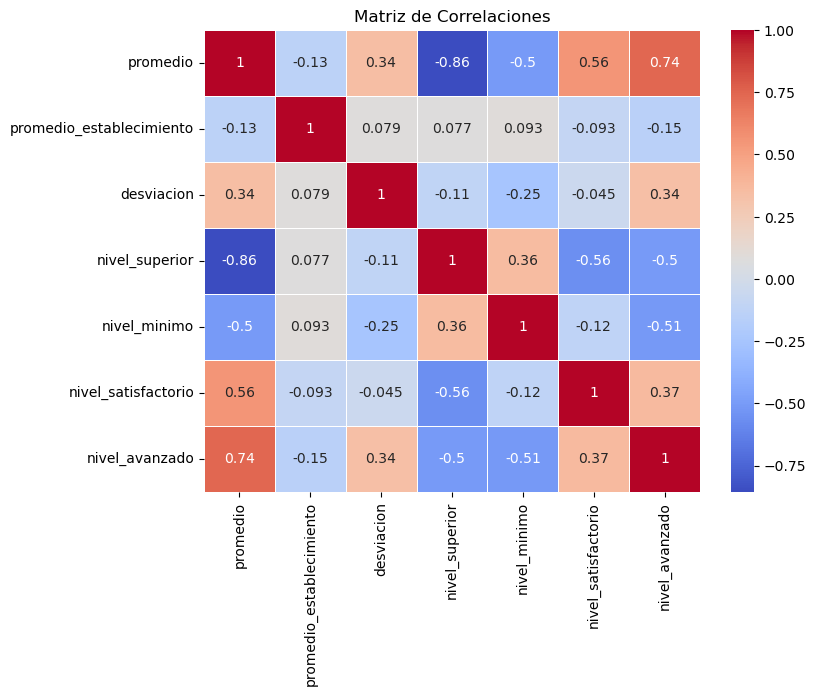

In [116]:
#Gráfico de la matriz de correlación
grafico_corr(data_boxcox_transformed)

<div style="text-align: center; font-size: 24px;">
    <strong>Reducción de dimensión por PCA</strong>
</div>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

res_pca = pca.fit(data_boxcox_transformed)

#Componentes principales (eigenvectors)
components = pd.DataFrame(res_pca.components_)
print("Componentes principales:")
components


Componentes principales:


0         1         2         3             4             5  \
0 -0.000001  0.004486 -0.011254  0.051878  9.969916e-01 -3.687550e-02   
1 -0.000004  0.014085  0.010182  0.291072 -5.432798e-02 -9.501773e-01   
2  0.000010  0.000400  0.063358 -0.926659  4.627383e-02 -3.063306e-01   
3 -0.000008  0.101327 -0.302486 -0.230842 -3.023934e-02  2.192067e-02   
4  0.000001  0.919481  0.391026  0.012395 -7.297688e-04  2.466908e-02   
5 -0.000005  0.379564 -0.866808  0.021161  2.339885e-05 -2.959473e-02   
6 -1.000000 -0.000002  0.000007 -0.000009 -1.580269e-07  7.961641e-07   

          6  
0 -0.042543  
1 -0.095846  
2  0.203248  
3 -0.918451  
4 -0.029843  
5  0.321327  
6  0.000008

In [ ]:
#Varianza explicada por cada componente principal (eigenvalues)
explained_variance = res_pca.explained_variance_
explained_variance_ratio = res_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Tabla de varianza
eigenvalues_table = pd.DataFrame({
    'Eigenvalue': explained_variance,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': cumulative_variance
})

print("Tabla de Eigenvalores y Varianza Acumulada:")
eigenvalues_table

Tabla de Eigenvalores y Varianza Acumulada:


Eigenvalue  Explained Variance Ratio  Cumulative Variance
0  3.139412e+02              9.075999e-01             0.907600
1  2.598348e+01              7.511790e-02             0.982718
2  3.479211e+00              1.005835e-02             0.992776
3  1.299979e+00              3.758222e-03             0.996534
4  7.258787e-01              2.098506e-03             0.998633
5  4.728956e-01              1.367135e-03             1.000000
6  1.432366e-10              4.140951e-13             1.000000

In [ ]:
#Obtener los componentes principales (scores)
pred = pca.transform(data_boxcox_transformed)
#Convertir a DataFrame para mejor manejo
pred_df = pd.DataFrame(pred, columns=[f'PC{i+1}' for i in range(pred.shape[1])])
pred_df

PC1        PC2       PC3       PC4       PC5       PC6       PC7
0     -8.078563   5.123450 -2.731738 -0.236979 -0.074454 -0.032306 -0.000010
1     11.422549  -2.838711  0.377999 -0.398137 -0.016034 -0.069128  0.000004
2     13.866449   0.418435 -0.043442 -0.416517 -0.170540  0.673240  0.000003
3     30.875239   2.690871  1.462685  0.186676  0.507917 -0.145164 -0.000009
4      9.658833   5.012400 -0.760584 -0.382497 -0.165862  0.611720  0.000019
...         ...        ...       ...       ...       ...       ...       ...
2145  -7.607165  -4.706377 -0.622765 -0.335245  0.058101  0.294989  0.000004
2146  -9.389277   2.934129 -1.672204 -1.425608  0.620480 -0.270346 -0.000016
2147  -0.939752  -3.847670  0.311386 -0.485342 -0.017664  0.406942  0.000008
2148 -38.190936  12.003149  5.400005  3.387099  0.587303 -1.249497  0.000010
2149 -38.191056  11.241163  4.979762  4.106208  0.700946 -1.392733  0.000006

[2150 rows x 7 columns]

<div style="text-align: center; font-size: 24px;">
    <strong>Gráfico de eigenvalores</strong>
</div>

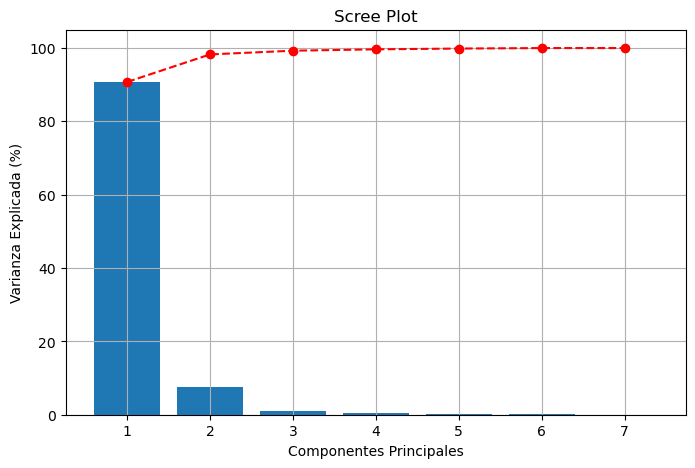

In [120]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, tick_label=range(1, len(explained_variance_ratio) + 1))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance * 100, color='red', marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada (%)')
plt.grid()
plt.show()

<div style="text-align: center; font-size: 24px;">
    <strong>Gráfico de Contribución de las Variables</strong>
</div>

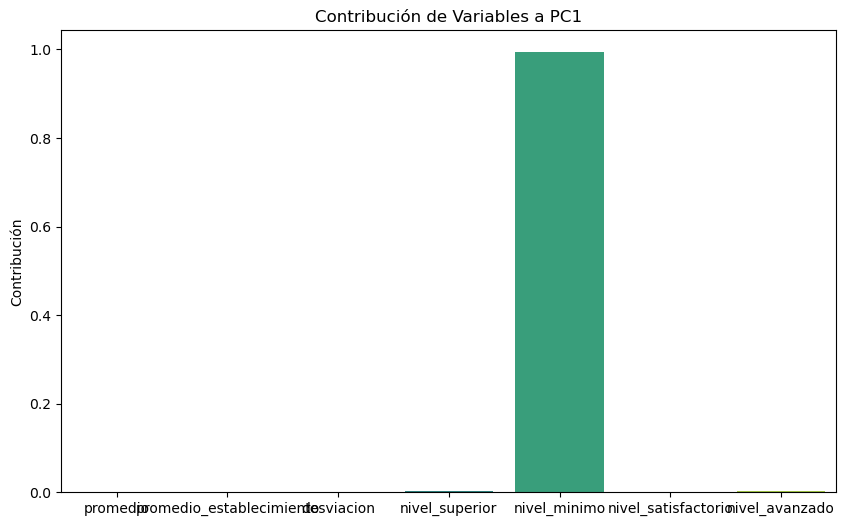

In [121]:
#Contribución de las variables a PC1
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
contrib_PC1 = np.square(loadings[:, 0]) / np.sum(np.square(loadings[:, 0]))

plt.figure(figsize=(10, 6))
sns.barplot(x=data_boxcox_transformed.columns, y=contrib_PC1, palette="viridis")
plt.title('Contribución de Variables a PC1')
plt.ylabel('Contribución')
plt.show()

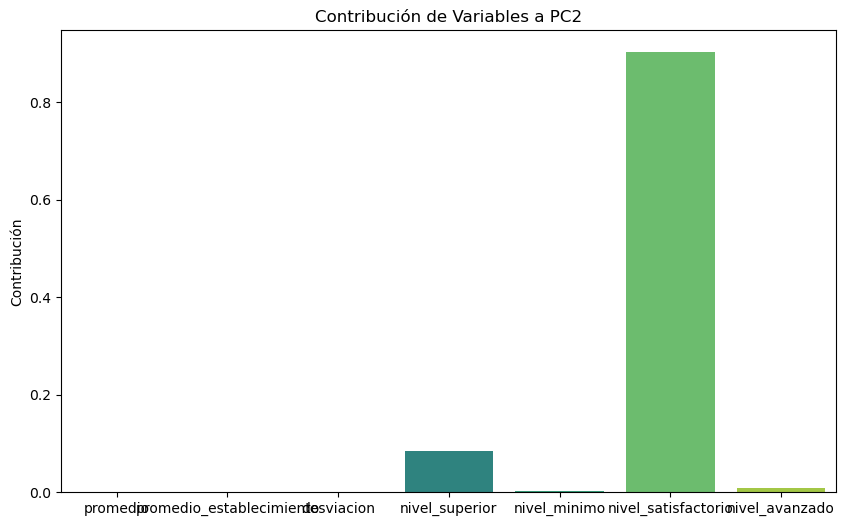

In [122]:
#Contribución de las variables a PC2
contrib_PC2 = np.square(loadings[:, 1]) / np.sum(np.square(loadings[:, 1]))

plt.figure(figsize=(10, 6))
sns.barplot(x=data_boxcox_transformed.columns, y=contrib_PC2, palette="viridis")
plt.title('Contribución de Variables a PC2')
plt.ylabel('Contribución')
plt.show()

<div style="text-align: center; font-size: 24px;">
    <strong>Clusterización</strong>
</div>

/home/dalev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dalev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dalev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dalev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

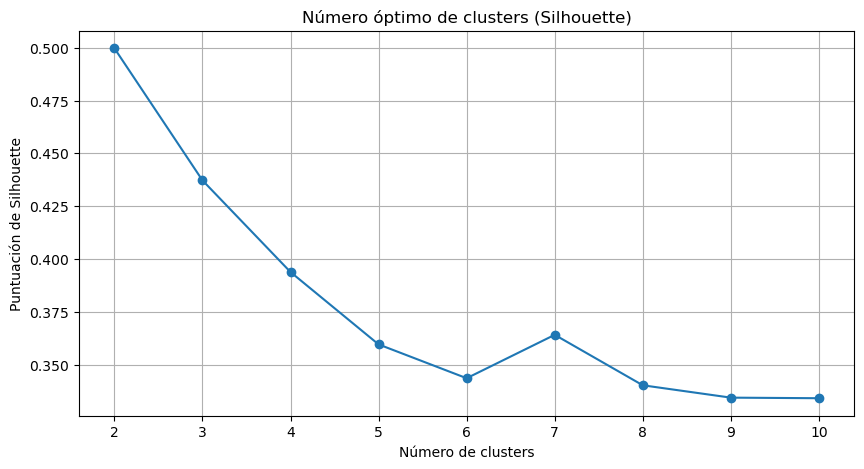

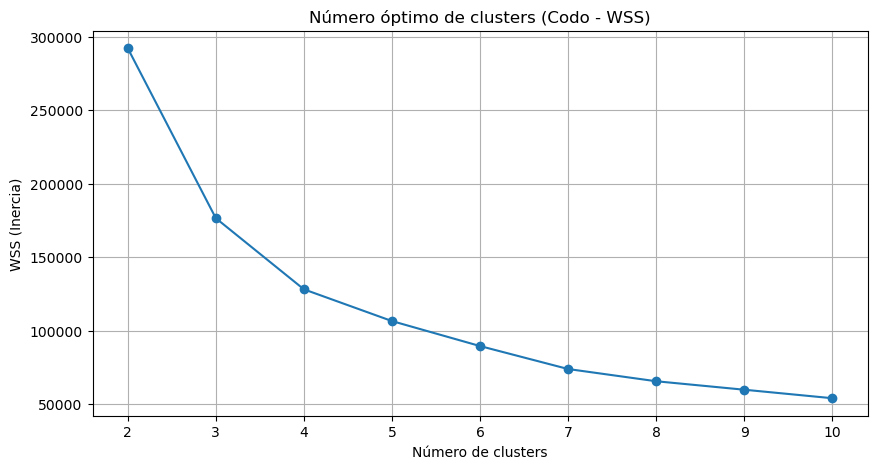

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


continuas = data_boxcox_transformed.values # Convertir a un array NumPy

#Rango de posibles números de clusters
range_n_clusters = range(2, 11) 

#Para guardar los valores
silhouette_scores = []
wss_scores = []

for n_clusters in range_n_clusters:
    #Ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(continuas)

    #Calcular la puntuación de Silhouette
    silhouette_avg = silhouette_score(continuas, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    #Calcular el WSS (Within-Cluster Sum of Squares)
    wss = kmeans.inertia_
    wss_scores.append(wss)

#Visualización de la Silhouette
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Número óptimo de clusters (Silhouette)')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de Silhouette')
plt.grid(True)
plt.show()

#Visualización de WSS (codo)
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wss_scores, marker='o')
plt.title('Número óptimo de clusters (Codo - WSS)')
plt.xlabel('Número de clusters')
plt.ylabel('WSS (Inercia)')
plt.grid(True)
plt.show()


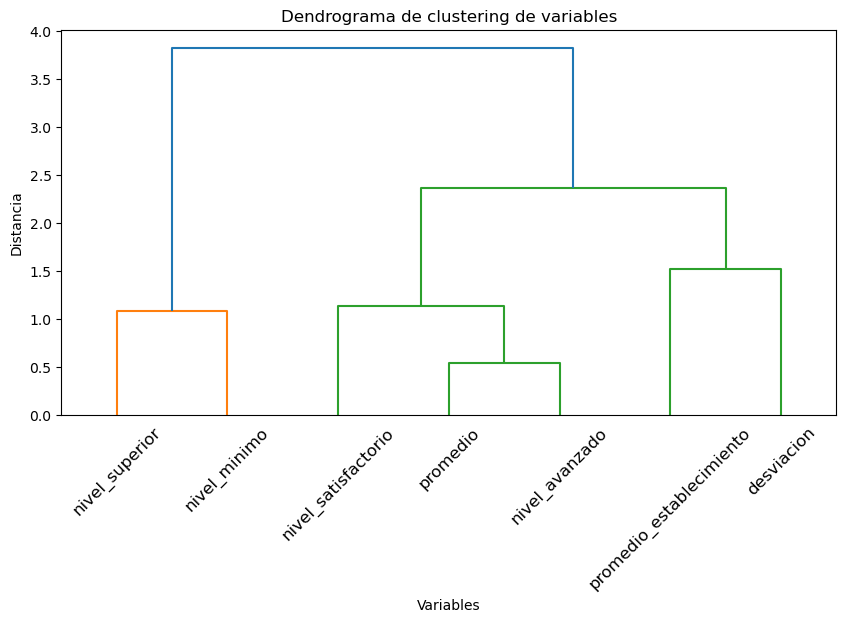

In [ ]:
#Ajuste del modelo KMeans con el número óptimo de clusters
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

data = data_boxcox_transformed

#Calcular matriz de correlación (similitud entre variables)
correlation_matrix = data.corr()

#Convertir correlación en una métrica de distancia (1 - correlación)
distance_matrix = 1 - correlation_matrix

#Aplicar clustering jerárquico
#Utilizar "linkage" para agrupar variables
linked = linkage(pdist(distance_matrix), method='ward')

#Dendrograma
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=data.columns, leaf_rotation=45, leaf_font_size=12)
plt.title('Dendrograma de clustering de variables')
plt.xlabel('Variables')
plt.ylabel('Distancia')
plt.show()


**Clusterización por PCA**

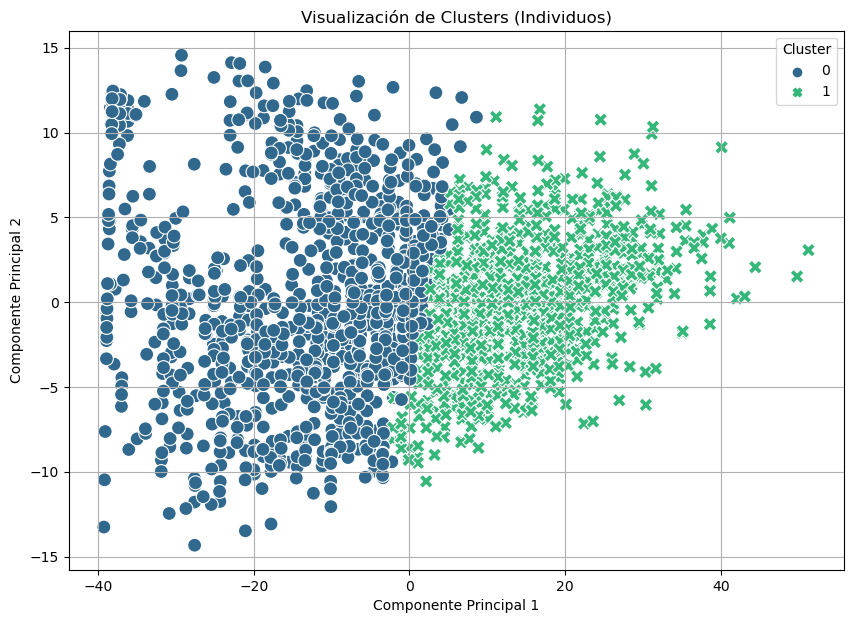

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


#Aplicar clustering jerárquico a los individuos
clustering = AgglomerativeClustering(n_clusters=2)  # Ajusta el número de clusters
labels = clustering.fit_predict(continuas)

#Reducir dimensiones a 2D para visualización (con PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
continuas_pca = pca.fit_transform(continuas)

#DataFrame para visualización
clustered_data = pd.DataFrame({
    'PCA1': continuas_pca[:, 0],
    'PCA2': continuas_pca[:, 1],
    'Cluster': labels
})

#Graficar los clusters 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=clustered_data,
    x='PCA1',
    y='PCA2',
    hue='Cluster',  
    palette='viridis',
    style='Cluster',  
    s=100  
)

#Personalización del gráfico
plt.title('Visualización de Clusters (Individuos)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
#Se guarda la data transformada en un archivo csv
data_boxcox_transformed.to_csv('/home/dalev/Escritorio/Prueba_Comfama/data/data_Transformada.csv', index=False)
